# Python-igraph编程实践基础教程：igraph官方手册使用解读

## igraph编程实践基础教程第14课：
## 官方示例讲解-使用cliques()计算和可视化图的派系（团）

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常（公众号、B站）
# 示例程序所用库的版本：igraph==0.10.4

In [2]:
import igraph as ig
import matplotlib.pyplot as plt

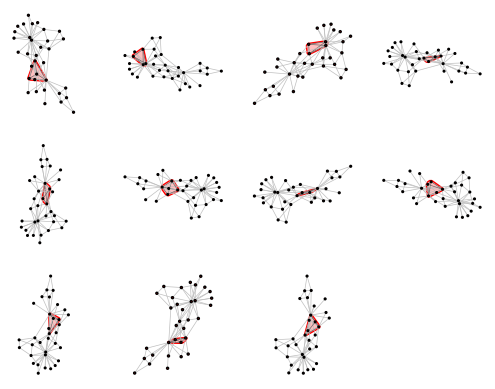

In [3]:
g = ig.Graph.Famous('Zachary')

# Compute cliques
cliques = g.cliques(4, 4)

# Plot each clique highlighted in a separate axes
fig, axs = plt.subplots(3, 4)
axs = axs.ravel()
for clique, ax in zip(cliques, axs):
    ig.plot(
        ig.VertexCover(g, [clique]),
        mark_groups=True, palette=ig.RainbowPalette(),
        edge_width=0.5,
        target=ax,
    )

plt.axis('off')
plt.show()

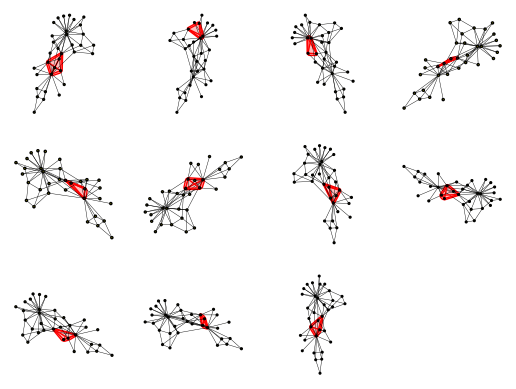

In [4]:
import igraph as ig
import matplotlib.pyplot as plt

g = ig.Graph.Famous('Zachary')
cliques = g.cliques(4, 4)

fig, axs = plt.subplots(3, 4)
axs = axs.ravel()
for clique, ax in zip(cliques, axs):
    # Color vertices yellow/red based on whether they are in this clique
    g.vs['color'] = 'yellow'
    g.vs[clique]['color'] = 'red'

    # Color edges black/red based on whether they are in this clique
    clique_edges = g.es.select(_within=clique)
    g.es['color'] = 'black'
    clique_edges['color'] = 'red'
    # also increase thickness of clique edges
    g.es['width'] = 0.3
    clique_edges['width'] = 1

    ig.plot(
        ig.VertexCover(g, [clique]),
        mark_groups=True,
        palette=ig.RainbowPalette(),
        target=ax,
    )

plt.axis('off')
plt.show()